<h1>FRANCIA
</h1>

Confronto dei dati relativi ai decessi registrati da EUROSTAT e i decessi causa COVID-19 registrati con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI TOTALI MENSILI FRANCIA</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Francia</b> dal <b>2015</b> al <b>30 settembre 2020</b>.

In [83]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_tot = pd.read_csv('../../csv/nazioni/serie_storica_fr.csv')
decessi_tot.head()

,TIME,GEO,Value
0,2015-01-05,France,12986
1,2015-01-12,France,13364
2,2015-01-19,France,13006
3,2015-01-26,France,12830
4,2015-02-02,France,13497


In [84]:
decessi_tot['TIME'] = pd.to_datetime(decessi_tot['TIME'])
decessi_tot.Value = pd.to_numeric(decessi_tot.Value)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [85]:
decessi_tot = decessi_tot[decessi_tot['TIME'] > '2020-02-29']
decessi_tot.head()

,TIME,GEO,Value
269,2020-03-02,France,12277
270,2020-03-09,France,12403
271,2020-03-16,France,12803
272,2020-03-23,France,14198
273,2020-03-30,France,16430


<h3>Creazione serie storica dei decessi totali</h3>

In [86]:
decessi_tot = decessi_tot.set_index('TIME')
decessi_tot = decessi_tot.groupby(pd.Grouper(freq='M')).sum()
decessi_tot = decessi_tot.Value
decessi_tot.head()

TIME
2020-03-31    68111
2020-04-30    65503
2020-05-31    45188
2020-06-30    54027
2020-07-31    42034
Freq: M, Name: Value, dtype: int64

<h2>DECESSI COVID REGISTRATI IN FRANCIA</h2>

Il DataFrame contine i dati relativi ai decessi per covid-19 registrati in <b>Francia</b> da <b> marzo 2020</b> al <b>30 settembre 2020</b>.

In [87]:
covid = pd.read_csv('../../csv/decessi_covid/serie_storica_decessi_covid_fr.csv')
covid.head()

,Unnamed: 0,Date,Value
0,0,2020-01-27,0.0
1,1,2020-02-03,0.0
2,2,2020-02-10,0.0
3,3,2020-02-17,1.0
4,4,2020-02-24,0.0


In [88]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.Value = pd.to_numeric(covid.Value)

In [89]:
covid = covid[covid['Date'] > '2020-02-29']
covid.head()

,Unnamed: 0,Date,Value
5,5,2020-03-02,1.0
6,6,2020-03-09,17.0
7,7,2020-03-16,72.0
8,8,2020-03-23,585.0
9,9,2020-03-30,1935.0


In [90]:
covid = covid.set_index('Date')
covid = covid.groupby(pd.Grouper(freq='M')).sum()
covid

,Unnamed: 0,Value
Date,,
2020-03-31,35,2610.0
2020-04-30,46,20248.0
2020-05-31,62,5511.0
2020-06-30,100,1411.0
2020-07-31,98,414.0
2020-08-31,145,416.0
2020-09-30,134,1064.0


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [91]:
covid = covid.Value
covid.head()

Date
2020-03-31     2610.0
2020-04-30    20248.0
2020-05-31     5511.0
2020-06-30     1411.0
2020-07-31      414.0
Freq: M, Name: Value, dtype: float64

<h2>PREDIZIONE DECESSI MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi registrati in <b>Francia</b> secondo la predizione del modello SARIMA applicato. 

In [92]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_fr.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,51261.460003
2,2015-03-31,54223.590896
3,2015-04-30,56282.157224
4,2015-05-31,55035.067827


In [93]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,51261.460003
2,2015-03-31,54223.590896
3,2015-04-30,56282.157224
4,2015-05-31,55035.067827


In [94]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [95]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,55619.906671
63,2020-04-30,49734.274624
64,2020-05-31,44092.716944
65,2020-06-30,51125.297404
66,2020-07-31,44835.644089


In [96]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,55619.906671
2020-04-30,49734.274624
2020-05-31,44092.716944
2020-06-30,51125.297404
2020-07-31,44835.644089


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [97]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA </h1>

<h3>Limite massimo

In [98]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_fr_upper.csv')
upper.head()

,Unnamed: 0,upper Value
0,2015-01-31,107468.742698
1,2015-02-28,71401.063956
2,2015-03-31,71850.337622
3,2015-04-30,71797.886608
4,2015-05-31,70532.260076


In [99]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper Value':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,107468.742698
1,2015-02-28,71401.063956
2,2015-03-31,71850.337622
3,2015-04-30,71797.886608
4,2015-05-31,70532.260076


In [100]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,67778.372347
2020-04-30,61897.205002
2020-05-31,56256.812721
2020-06-30,63298.560302
2020-07-31,57017.819008


In [101]:
upper = upper.Totale

<h3>Limite minimo

In [102]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_fr_lower.csv')
lower.head()

,Unnamed: 0,lower Value
0,2015-01-31,-107468.742698
1,2015-02-28,31121.856051
2,2015-03-31,36596.844170
3,2015-04-30,40766.427839
4,2015-05-31,39537.875578


In [103]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower Value':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-107468.742698
1,2015-02-28,31121.856051
2,2015-03-31,36596.844170
3,2015-04-30,40766.427839
4,2015-05-31,39537.875578


In [104]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,43461.440995
2020-04-30,37571.344246
2020-05-31,31928.621166
2020-06-30,38952.034506
2020-07-31,32653.469170


In [105]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> registrati in <b>Francia</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b>, <b>giugno</b>, <b>luglio</b>, <b>agosto</b> e <b>settembre</b>.

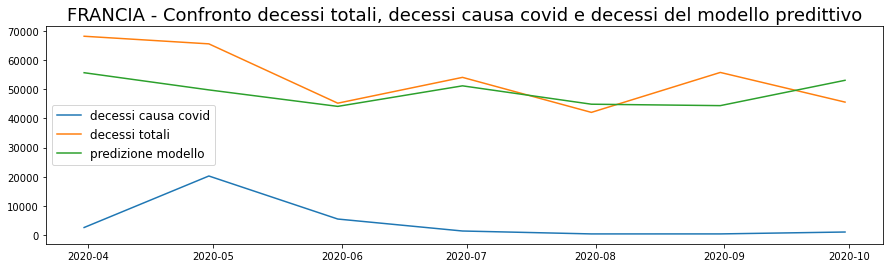

In [106]:
plt.figure(figsize=(15,4))
plt.title('FRANCIA - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_tot, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

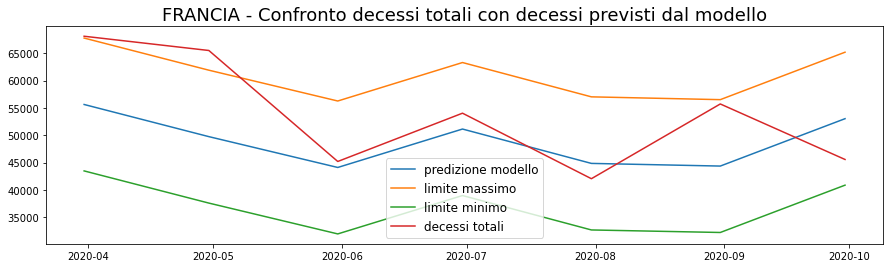

In [107]:
plt.figure(figsize=(15,4))
plt.title("FRANCIA - Confronto decessi totali con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_tot, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali e i decessi secondo la previsione del modello SARIMA.

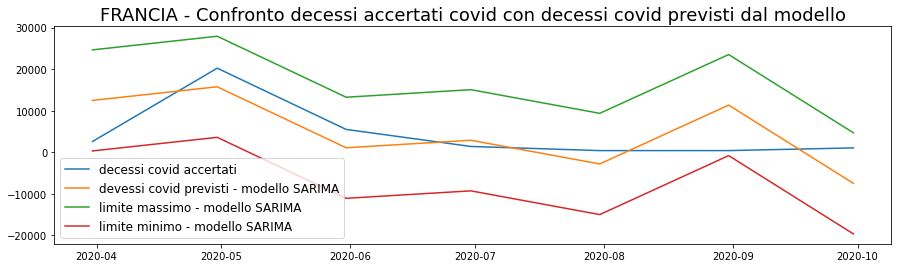

In [108]:
n = decessi_tot - predictions
n_upper = decessi_tot - lower
n_lower = decessi_tot - upper

plt.figure(figsize=(15,4))
plt.title("FRANCIA - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali per i mesi di marzo, aprile, maggio, giugno, luglio e settembre 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

<h3>Numero totale dei decessi accertati COVID-19 registrati in Francia</h3>

In [109]:
m = covid.sum()
print(int(m))

31674


<h3>Numero totale dei decessi COVID-19 previsti dal modello per la Francia </h3>

<h4>Valore medio

In [110]:
total = n.sum()
print(int(total))

33355


<h4>Valore massimo

In [111]:
total_upper = n_upper.sum()
print(int(total_upper))

118520


<h4>Valore minimo

In [112]:
total_lower = n_lower.sum()
print(int(total_lower))

-51810


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA in Francia</h3>

<h4>Valore medio

In [113]:
x = decessi_tot - predictions - covid
x = x.sum()
print(int(x))

1681


<h4>Valore massimo

In [114]:
x_upper = decessi_tot - lower - covid
x_upper = x_upper.sum()
print(int(x_upper))

86846


<h4>Valore minimo

In [115]:
x_lower = decessi_tot - upper - covid
x_lower = x_lower.sum()
print(int(x_lower))

-83484
